# Logistic Regression

## Using Gradient Descent for Logistic Regression

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
def initialize_weights(dim):
    ''' Initialize our weights and bias'''
    #initialize the weights to zeros array of (dim,1) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(X_train[0])
    b = 0
    return w,b

def sigmoid(z):
    ''' Return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1/(1+np.exp(-z))
  
def logloss(y_true,y_pred):
    '''Compute log loss '''
    sum = 0
    for i in range(len(y_true)):
        sum += (y_true[i] * np.log10(y_pred[i])) + ((1 - y_true[i]) * np.log10(1 - y_pred[i]))
    loss = -1 * (1 / len(y_true)) * sum
    return loss
  
def gradient_dw(x,y,w,b,alpha,N):
    '''Compute the gardient w.r.to w '''
    dw = x * (y - sigmoid(np.dot(w,x) + b) - (alpha / N) * w)
    return dw

def gradient_db(x,y,w,b):
    '''Compute gradient w.r.to b '''
    db = y - sigmoid(np.dot(w,x) + b)
    return db


### Generate Data

In [3]:
## Custom Dataset
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
##Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

### Train Model

In [4]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    
    ''' Implement logistic regression'''
    #Here eta0 is learning rate
    train_loss = []
    test_loss = []
    w, b = initialize_weights(X_train[0])
    for i in range(epochs):
        train_pred = []
        test_pred = []
        for j in range(N):
            dw = gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
            db = gradient_db(X_train[j],y_train[j],w,b)
            w = w + (eta0 * dw)
            b = b + (eta0 * db)
        for val in range(N):
            train_pred.append(sigmoid(np.dot(w, X_train[val]) + b))
            
        loss1 = logloss(y_train, train_pred)
        train_loss.append(loss1)
            
        for val in range(len(X_test)):
            test_pred.append(sigmoid(np.dot(w, X_test[val]) + b))
            
        loss2 = logloss(y_test, test_pred)
        test_loss.append(loss2)
        
    return w,b,train_loss,test_loss     

In [7]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,train_log_loss,test_log_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

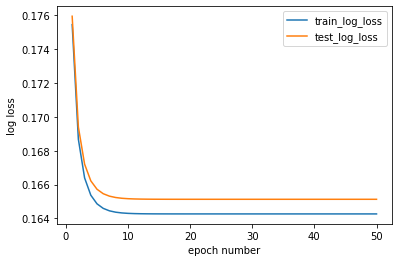

In [8]:
from matplotlib import pyplot as plt
epoch = [i for i in range(1,51,1)]

plt.plot(epoch,train_log_loss , label='train_log_loss')
plt.plot(epoch,test_log_loss, label='test_log_loss')
plt.xlabel("epoch number")
plt.ylabel("log loss")
plt.legend()
plt.show()